In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm, binom
from scipy.stats import poisson
import seaborn as sns
import env
np.random.seed(123)

In [2]:
from env import host, user, password
database = "iris_db"

def get_db_url(user,host,password,database):

    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    
    return url

url = get_db_url(user,host,password,database)

database_name = "iris_db"
query = """ 
            SELECT *
            FROM measurements as m
            JOIN species as s
            USING (species_id)
        """
df_iris = pd.read_sql(query, url)


# 4) In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [3]:
# print the first 3 rows

df_iris.head(3)

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa


In [4]:
#print the number of rows and columns (shape)

df_iris.shape

(150, 7)

In [5]:
#print the column names

df_iris.columns.to_list()

['species_id',
 'measurement_id',
 'sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width',
 'species_name']

In [6]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   measurement_id  150 non-null    int64  
 2   sepal_length    150 non-null    float64
 3   sepal_width     150 non-null    float64
 4   petal_length    150 non-null    float64
 5   petal_width     150 non-null    float64
 6   species_name    150 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB


In [7]:
# print the data type of each column

df_iris.dtypes

species_id          int64
measurement_id      int64
sepal_length      float64
sepal_width       float64
petal_length      float64
petal_width       float64
species_name       object
dtype: object

In [8]:
# print the summary statistics for each of the numeric variables


stats = df_iris.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
species_id,150.0,2.000000,0.819232,1.0,1.00,2.00,3.00,3.0
measurement_id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
sepal_length,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.80,3.00,3.30,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.60,4.35,5.10,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.30,1.30,1.80,2.5


In [9]:
stats['range'] = stats['max'] - stats['min']
stats

,count,mean,std,min,25%,50%,75%,max,range
species_id,150.0,2.000000,0.819232,1.0,1.00,2.00,3.00,3.0,2.0
measurement_id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0,149.0
sepal_length,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9,3.6
sepal_width,150.0,3.057333,0.435866,2.0,2.80,3.00,3.30,4.4,2.4
petal_length,150.0,3.758000,1.765298,1.0,1.60,4.35,5.10,6.9,5.9
petal_width,150.0,1.199333,0.762238,0.1,0.30,1.30,1.80,2.5,2.4


In [10]:
stats[['mean', '50%', 'std', 'range']]

,mean,50%,std,range
species_id,2.000000,2.00,0.819232,2.0
measurement_id,75.500000,75.50,43.445368,149.0
sepal_length,5.843333,5.80,0.828066,3.6
sepal_width,3.057333,3.00,0.435866,2.4
petal_length,3.758000,4.35,1.765298,5.9
petal_width,1.199333,1.30,0.762238,2.4


In [11]:
subset_of_columns = ['mean', '50%', 'std', 'range']
stats[subset_of_columns]

,mean,50%,std,range
species_id,2.000000,2.00,0.819232,2.0
measurement_id,75.500000,75.50,43.445368,149.0
sepal_length,5.843333,5.80,0.828066,3.6
sepal_width,3.057333,3.00,0.435866,2.4
petal_length,3.758000,4.35,1.765298,5.9
petal_width,1.199333,1.30,0.762238,2.4


# 5) Read the Table1_CustDetails table from your spreadsheet exercises google sheet into a dataframe named df_google_sheets.

In [12]:
import pandas as pd

sheet_url = 'https://docs.google.com/spreadsheets/d/1d5Zzy-wq9-tnXnKbhaoDEuOnD_7NqXGyPfr7UTIwNmQ/edit#gid=1023018493'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google_sheets = pd.read_csv(csv_export_url)
df_google_sheets.head()


,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0013-SMEOE,Female,1,Yes,No,1,2,2,Bank transfer (automatic),109.70,7904.25,No,72.1
1,0257-ZESQC,Female,1,Yes,No,1,2,0,Bank transfer (automatic),75.20,1929.35,Yes,25.7
2,0442-ZXKVS,Female,1,Yes,No,2,2,1,Bank transfer (automatic),115.60,6431.05,No,55.6
3,0993-OSGPT,Female,1,Yes,No,1,1,1,Bank transfer (automatic),60.65,3975.90,No,65.6
4,1167-OYZJF,Female,1,Yes,No,1,0,2,Bank transfer (automatic),20.05,1263.05,No,63.0


In [13]:
# assign the first 100 rows to a new dataframe, 
# df_google_sheets_sample

df_google_sheets_sample = df_google_sheets.iloc[:100] 

In [14]:
df_google_sheets_sample.shape

(100, 13)

In [15]:
df_google_sheets_sample


,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0013-SMEOE,Female,1,Yes,No,1,2,2,Bank transfer (automatic),109.70,7904.25,No,72.1
1,0257-ZESQC,Female,1,Yes,No,1,2,0,Bank transfer (automatic),75.20,1929.35,Yes,25.7
2,0442-ZXKVS,Female,1,Yes,No,2,2,1,Bank transfer (automatic),115.60,6431.05,No,55.6
3,0993-OSGPT,Female,1,Yes,No,1,1,1,Bank transfer (automatic),60.65,3975.90,No,65.6
4,1167-OYZJF,Female,1,Yes,No,1,0,2,Bank transfer (automatic),20.05,1263.05,No,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6397-JNZZG,Female,1,Yes,No,0,1,0,Credit card (automatic),55.55,2342.20,Yes,42.2
96,6425-YQLLO,Female,1,Yes,No,2,2,1,Credit card (automatic),105.95,6975.25,Yes,65.8
97,6437-UDQJM,Female,1,Yes,No,2,1,2,Credit card (automatic),84.10,6129.65,No,72.9
98,6575-SUVOI,Female,1,Yes,No,2,1,0,Credit card (automatic),69.50,1752.65,No,25.2


In [16]:
# print the number of rows of your original dataframe
df_google_sheets.shape

(7049, 13)

In [17]:
# print the first 5 column names

# df_google_sheets.columns
   
# list(df_google_sheets)

N = 5
# Select first N columns
df_googlesheets  = df_google_sheets.iloc[: , :N]
list(df_googlesheets.columns)

['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents']

In [18]:
df_google_sheets.dtypes

customer_id           object
gender                object
is_senior_citizen      int64
partner               object
dependents            object
phone_service          int64
internet_service       int64
contract_type          int64
payment_type          object
monthly_charges      float64
total_charges        float64
churn                 object
tenure               float64
dtype: object

In [19]:
# print the column names that have a data type of object
df_google_sheets.select_dtypes(include=['object']).columns.tolist()


['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']

In [20]:
# compute the range for each of the numeric variables.

df_google_sheets.describe().T

,count,mean,std,min,25%,50%,75%,max
is_senior_citizen,7049.0,0.162009,0.368485,0.00,0.0000,0.00,0.000,1.00
phone_service,7049.0,1.324585,0.642709,0.00,1.0000,1.00,2.000,2.00
internet_service,7049.0,1.222585,0.779068,0.00,1.0000,1.00,2.000,2.00
contract_type,7049.0,0.690878,0.833757,0.00,0.0000,0.00,1.000,2.00
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80
tenure,7049.0,32.380068,24.594926,0.00,8.7000,28.70,55.200,79.30


In [21]:
telco_stats = df_google_sheets[['monthly_charges', 'total_charges' ]].describe().T
telco_stats

,count,mean,std,min,25%,50%,75%,max
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80


In [22]:
telco_stats['range'] = telco_stats['max'] - telco_stats['min']
telco_stats

,count,mean,std,min,25%,50%,75%,max,range
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75,100.5
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80,8666.0


# 6) Download your spreadsheet exercises google sheet as an excel file (File → Download → Microsoft Excel). Read the Table1_CustDetails worksheet into a dataframe named df_excel.

In [23]:
import pandas as pd

sheet_url = 'https://docs.google.com/spreadsheets/d/1d5Zzy-wq9-tnXnKbhaoDEuOnD_7NqXGyPfr7UTIwNmQ/edit#gid=1023018493'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_excel = pd.read_csv(csv_export_url)
df_excel.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0013-SMEOE,Female,1,Yes,No,1,2,2,Bank transfer (automatic),109.70,7904.25,No,72.1
1,0257-ZESQC,Female,1,Yes,No,1,2,0,Bank transfer (automatic),75.20,1929.35,Yes,25.7
2,0442-ZXKVS,Female,1,Yes,No,2,2,1,Bank transfer (automatic),115.60,6431.05,No,55.6
3,0993-OSGPT,Female,1,Yes,No,1,1,1,Bank transfer (automatic),60.65,3975.90,No,65.6
4,1167-OYZJF,Female,1,Yes,No,1,0,2,Bank transfer (automatic),20.05,1263.05,No,63.0


In [24]:
# assign the first 100 rows to a new dataframe, df_excel_sample
df_excel.head(100)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0013-SMEOE,Female,1,Yes,No,1,2,2,Bank transfer (automatic),109.70,7904.25,No,72.1
1,0257-ZESQC,Female,1,Yes,No,1,2,0,Bank transfer (automatic),75.20,1929.35,Yes,25.7
2,0442-ZXKVS,Female,1,Yes,No,2,2,1,Bank transfer (automatic),115.60,6431.05,No,55.6
3,0993-OSGPT,Female,1,Yes,No,1,1,1,Bank transfer (automatic),60.65,3975.90,No,65.6
4,1167-OYZJF,Female,1,Yes,No,1,0,2,Bank transfer (automatic),20.05,1263.05,No,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6397-JNZZG,Female,1,Yes,No,0,1,0,Credit card (automatic),55.55,2342.20,Yes,42.2
96,6425-YQLLO,Female,1,Yes,No,2,2,1,Credit card (automatic),105.95,6975.25,Yes,65.8
97,6437-UDQJM,Female,1,Yes,No,2,1,2,Credit card (automatic),84.10,6129.65,No,72.9
98,6575-SUVOI,Female,1,Yes,No,2,1,0,Credit card (automatic),69.50,1752.65,No,25.2


In [25]:
# print the number of rows of your original dataframe

df_excel.shape

(7049, 13)

In [26]:
# print the first 5 column names

df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [27]:
# print the column names that have a data type of object

df_excel.dtypes

customer_id           object
gender                object
is_senior_citizen      int64
partner               object
dependents            object
phone_service          int64
internet_service       int64
contract_type          int64
payment_type          object
monthly_charges      float64
total_charges        float64
churn                 object
tenure               float64
dtype: object

In [28]:
df_excel.select_dtypes(include=['object'])



,customer_id,gender,partner,dependents,payment_type,churn
0,0013-SMEOE,Female,Yes,No,Bank transfer (automatic),No
1,0257-ZESQC,Female,Yes,No,Bank transfer (automatic),Yes
2,0442-ZXKVS,Female,Yes,No,Bank transfer (automatic),No
3,0993-OSGPT,Female,Yes,No,Bank transfer (automatic),No
4,1167-OYZJF,Female,Yes,No,Bank transfer (automatic),No
...,...,...,...,...,...,...
7044,9863-JZAIC,Male,No,No,Mailed check,Yes
7045,9932-WBWIK,Male,No,No,Mailed check,No
7046,9953-ZMKSM,Male,No,No,Mailed check,No
7047,9975-SKRNR,Male,No,No,Mailed check,No


In [29]:
# compute the range for each of the numeric variables.

df_excel.describe()

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges,tenure
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7038.000000,7049.000000
mean,0.162009,1.324585,1.222585,0.690878,64.747014,2283.043883,32.380068
std,0.368485,0.642709,0.779068,0.833757,30.099460,2266.521984,24.594926
min,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,35.450000,401.587500,8.700000
50%,0.000000,1.000000,1.000000,0.000000,70.350000,1397.100000,28.700000
75%,0.000000,2.000000,2.000000,1.000000,89.850000,3793.775000,55.200000
max,1.000000,2.000000,2.000000,2.000000,118.750000,8684.800000,79.300000


# 7) Read the data from this google sheet into a dataframe, df_google.


In [30]:
import pandas as pd

sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)
df_google.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
# print the first 3 rows

df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [32]:
# print the number of rows and columns

df_google.shape

(891, 12)

In [33]:
# print the column names

df_google.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [34]:
# print the data type of each column

df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [35]:
# print the summary statistics for each of the numeric variables

df_google.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [36]:
df_google.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
# print the unique values for each of your categorical variables

print(df_google['PassengerId'].nunique())

891


In [38]:
print(df_google['Embarked'].unique())

['S' 'C' 'Q' nan]


In [39]:
cat_col = ['Survived', 'Pclass', 'Sex', 'Embarked' ]

In [40]:
for column in cat_col:
    print(df_google[column].value_counts())

0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [41]:
df_google.value_counts()

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

# Make a new python module, acquire.py to hold the following data aquisition functions:

In [42]:
import pandas as pd
import numpy as np
import os
import acquire
from env import host, user, password

In [43]:
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


## Exercises

The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.


# Using the Iris Data:

In [44]:
import pandas as pd
import numpy as np
import os
from env import host, user, password
import matplotlib.pyplot as plt

# import our own acquire module
import acquire


In [45]:
# 1) Use the function defined in acquire.py to load the iris data.

df_iris = acquire.new_iris_data()
df_iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [46]:
# 2) Drop the species_id and measurement_id columns.

columns_to_drop = ['species_id', 'measurement_id']
data = df_iris.drop(columns = columns_to_drop)

In [47]:
# 3) Rename the species_name column to just species.

data = data.rename(columns={'species_name': 'species'})

data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [48]:
# 4) Create dummy variables of the species name and concatenate onto 
# the iris dataframe. (This is for practice, we don't always have to 
# encode the target, but if we used species as a feature, we would 
# need to encode it).

dummy_iris = pd.get_dummies(data[['species']], dummy_na=False, drop_first=[True])
dummy_iris.head()

,species_versicolor,species_virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [49]:
data = pd.concat([data, dummy_iris], axis=1)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [50]:
# 5) Create a function named prep_iris that accepts the untransformed 
# iris data, and returns the data with the transformations above applied.

def prep_iris(data):
    data.drop(columns=['species_id'], inplace=True)
    data.rename(columns={'species_name':'species'}, inplace=True)
    dummy_iris = pd.get_dummies(data[['species']], dummy_na=False, drop_first=[True])
    data = pd.concat([data, dummy_iris], axis=1)
    return data

In [51]:
data = acquire.new_iris_data()
data = prep_iris(data)
data.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,1,5.1,3.5,1.4,0.2,setosa,0,0
1,2,4.9,3.0,1.4,0.2,setosa,0,0
2,3,4.7,3.2,1.3,0.2,setosa,0,0
3,4,4.6,3.1,1.5,0.2,setosa,0,0
4,5,5.0,3.6,1.4,0.2,setosa,0,0


# Using the Titanic dataset



In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
import acquire

# Remove limits on viewing dataframes
pd.set_option('display.max_columns', None)

In [73]:
# 1) Use the function defined in acquire.py to load the Titanic data.

df = acquire.get_titanic_data()



In [74]:
# rows & columns

df.shape



(891, 13)

In [75]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [77]:
# takeaways
# survied is out target variable ( it sill not be a "feature"of our model)
# passanger_id needs to be removed.
# pclass and class are the same data, we need to decide which one is worth keeping
# embarked and embark_town are same data, we need to decide which one is worth keeping
# some people dont have Sib or spouse and are not alone

In [78]:
pd.crosstab(df['class'], df.pclass)

pclass,1,2,3
class,,,
First,216,0,0
Second,0,184,0
Third,0,0,491


In [79]:
#### Gather our takeaways, i.e., what we are going to do when we clean:

In [80]:
df.describe()

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [81]:
df.columns.to_list()

['passenger_id',
 'survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'deck',
 'embark_town',
 'alone']

In [82]:
numcols = [col for col in df.columns if df[col].dtype != 'O']

In [83]:
catcols = [col for col in df.columns if df[col].dtype == 'O']

In [84]:
catcols

['sex', 'embarked', 'class', 'deck', 'embark_town']

In [85]:
for col in catcols:
    print(f"Columns: {col}")
    print(df[col].value_counts())
    print("----------")
    print(df[col].value_counts(normalize=True, dropna=False))
    print("=============")

Columns: sex
male      577
female    314
Name: sex, dtype: int64
----------
male      0.647587
female    0.352413
Name: sex, dtype: float64
Columns: embarked
S    644
C    168
Q     77
Name: embarked, dtype: int64
----------
S      0.722783
C      0.188552
Q      0.086420
NaN    0.002245
Name: embarked, dtype: float64
Columns: class
Third     491
First     216
Second    184
Name: class, dtype: int64
----------
Third     0.551066
First     0.242424
Second    0.206510
Name: class, dtype: float64
Columns: deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64
----------
NaN    0.772166
C      0.066218
B      0.052750
D      0.037037
E      0.035915
A      0.016835
F      0.014590
G      0.004489
Name: deck, dtype: float64
Columns: embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64
----------
Southampton    0.722783
Cherbourg      0.188552
Queenstown     0.086420
NaN            0.002245
Name: embark_town, dtyp

passenger_id


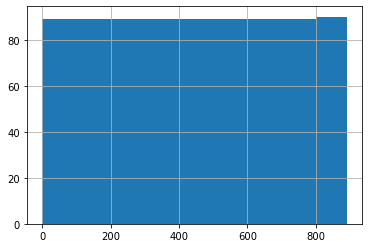

survived


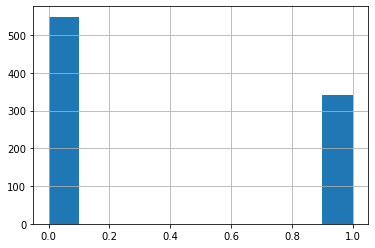

pclass


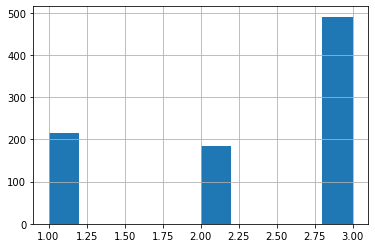

age


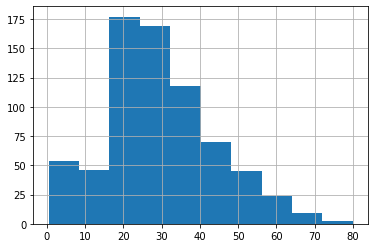

sibsp


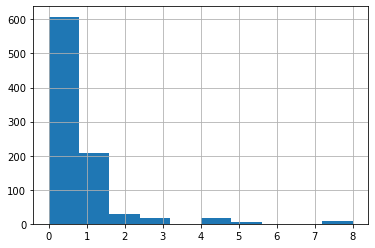

parch


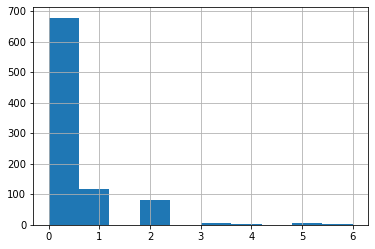

fare


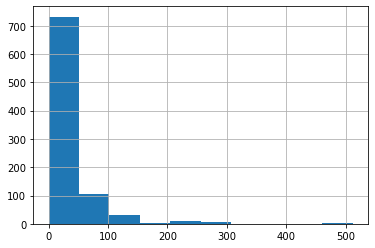

alone


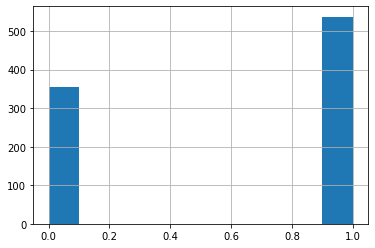

In [86]:
# histograms of numeric columns 
for col in numcols:
    print(col)
    df[col].hist()
    plt.show()

## Takeaways
- removed embarked
- remove class
- remove passenger_id
- remove deck
    - to many nulls, would need to build predictive model, not worth time
- lots of missing information in age
    - going to have to impute nulls
- two nulls in embarked_town
    - going to have to imput data. may have to keep both



In [87]:
#2) Drop any unnecessary, unhelpful, or duplicated columns.

df.drop_duplicates(inplace=True)

In [88]:
df.shape

(891, 13)

In [89]:
columns_to_drop = ['embarked', 'class', 'passenger_id', 'deck']

In [92]:
data = df.drop(columns = columns_to_drop) #save to new variable so you don't mess up data

In [93]:
# 3) Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

dummy_df = pd.get_dummies(data[['sex', 'embark_town']], dummy_na=False, drop_first=[True, True])

In [94]:
dummy_df.head()

,sex_male,embark_town_Queenstown,embark_town_Southampton
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [95]:
# Concatenate my dummy_df to my data

data = pd.concat([data, dummy_df], axis=1)
data

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,22.0,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Southampton,1,1,0,1
887,1,1,female,19.0,0,0,30.0000,Southampton,1,0,0,1
888,0,3,female,NaN,1,2,23.4500,Southampton,0,0,0,1
889,1,1,male,26.0,0,0,30.0000,Cherbourg,1,1,0,0


# 4) Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.




In [96]:
def clean_titanic_data(df):
    '''
    Takes in a titanic dataframe and returns a clean dataframe
    Arguments: df - a pandas dataframe with the expected feature names and columns 
    Returns: clean_df - a dataframe with the clean operations to proformed on it
    '''
    #drop dupilcated
    df.drop_duplicates(inplace=True)
    # drop columns
    columns_to_drop = ['embarked', 'class', 'passenger_id', 'deck']
    df = df.drop(columns = columns_to_drop)
    # encoded cat variables 
    dummy_df = pd.get_dummies(data[['sex', 'embark_town']], dummy_na=False, drop_first=[True, True])
    df = pd.concat([df, dummy_df], axis=1)
    return df.drop(columns = ['sex', 'embark_town'])



In [97]:
df = acquire.get_titanic_data()
clean_df = clean_titanic_data(df)
clean_df

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,1,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,1
888,0,3,NaN,1,2,23.4500,0,0,0,1
889,1,1,26.0,0,0,30.0000,1,1,0,0


In [98]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   age                      714 non-null    float64
 3   sibsp                    891 non-null    int64  
 4   parch                    891 non-null    int64  
 5   fare                     891 non-null    float64
 6   alone                    891 non-null    int64  
 7   sex_male                 891 non-null    uint8  
 8   embark_town_Queenstown   891 non-null    uint8  
 9   embark_town_Southampton  891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.3 KB


# Train, Validate, Test Split

In [99]:
# 20% test, 80% train_validate
# then of the 80% train_validate: 30% validate, 70% train. 

train, test = train_test_split(clean_df, train_size = 0.2,
                               stratify = clean_df.survived, 
                               random_state=1234)

In [100]:
train.shape

(178, 10)

In [101]:
test.shape

(713, 10)

In [102]:
train, validate = train_test_split(train, test_size = 0.3,  
                                   stratify=train.survived,
                                   random_state=1234)

In [103]:
train.shape

(124, 10)

In [104]:
validate.shape

(54, 10)

In [105]:
test.shape

(713, 10)

In [106]:
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
319,1,1,40.0,1,1,134.5000,0,0,0,0
710,1,1,24.0,0,0,49.5042,1,0,0,0
418,0,2,30.0,0,0,13.0000,1,1,0,1
96,0,1,71.0,0,0,34.6542,1,1,0,0
100,0,3,28.0,0,0,7.8958,1,0,0,1


In [107]:
validate.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
872,0,1,33.0,0,0,5.0000,1,1,0,1
494,0,3,21.0,0,0,8.0500,1,1,0,1
287,0,3,22.0,0,0,7.8958,1,1,0,1
741,0,1,36.0,1,0,78.8500,0,1,0,1
198,1,3,NaN,0,0,7.7500,1,0,1,0


In [108]:
test.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
83,0,1,28.0,0,0,47.1000,1,1,0,1
707,1,1,42.0,0,0,26.2875,1,1,0,1
658,0,2,23.0,0,0,13.0000,1,1,0,1
808,0,2,39.0,0,0,13.0000,1,1,0,1
508,0,3,28.0,0,0,22.5250,1,1,0,1


# Option for Missing Values: Impute
We can impute values using the mean, median, mode (most frequent), or a constant value. We will use sklearn.imputer.SimpleImputer to do this.

1) Create the imputer object, selecting the strategy used to impute (mean, median or mode (strategy = 'most_frequent').
2) Fit to train. This means compute the mean, median, or most_frequent (i.e. mode) for each of the columns that will be imputed. Store that value in the imputer object.
3) Transform train: fill missing values in train dataset with that value identified
4) Transform test: fill missing values with that value identified




In [109]:
#1. Create the `SimpleImputer` object, which we will store in the 
# variable `imputer`. In the creation of the object, we will specify 
# the strategy to use (`mean`, `median`, `most_frequent`). Essentially, 
# this is creating the instructions and assigning them to a variable 
# we will reference.  


In [110]:
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)



In [111]:
#2) Fit the imputer to the columns in the training df. This means that 
# the imputer will determine the most_frequent value, or other value 
# depending on the strategy called, for each column.

In [112]:
imputer = imputer.fit(train[['age']])
train[['age']] = imputer.transform(train[['age']])

In [113]:
# 3. It will store that value in the imputer object to use upon 
# calling `transform.` We will call `transform` on each of our samples 
# to fill any missing values.  

In [114]:
validate[['age']]= imputer.transform(validate[['age']])

In [115]:
test[['age']]= imputer.transform(test[['age']])

In [116]:
def impute_age(train, validate, test):
    '''
    Imputes the mean age of trrain to all three databases
    '''
    imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
    imputer = imputer.fit(train[['age']])
    train[['age']] = imputer.transform(train[['age']])
    validate[['age']]= imputer.transform(validate[['age']])
    test[['age']]= imputer.transform(test[['age']])
    return train, validate, test



In [117]:
def prep_titanic_data(df):
    df = clean_titanic_data(df)
    train, test = train_test_split(df, 
                                   train_size = 0.2,
                                   stratify = clean_df.survived, 
                                   random_state=1234)
    
    train, validate = train_test_split(train, test_size = 0.3,  
                                       stratify=train.survived,
                                       random_state=1234)
    train, validate, test = impute_age(train, validate, test)
    return train, validate, test



In [118]:
df = acquire.get_titanic_data()
train, validata, test = prep_titanic_data(df)
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
319,1,1,40.0,1,1,134.5000,0,0,0,0
710,1,1,24.0,0,0,49.5042,1,0,0,0
418,0,2,30.0,0,0,13.0000,1,1,0,1
96,0,1,71.0,0,0,34.6542,1,1,0,0
100,0,3,28.0,0,0,7.8958,1,0,0,1


In [119]:
train.isna().sum()

survived                   0
pclass                     0
age                        0
sibsp                      0
parch                      0
fare                       0
alone                      0
sex_male                   0
embark_town_Queenstown     0
embark_town_Southampton    0
dtype: int64

# Using the Telco dataset


In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# train test split from sklearn
from sklearn.model_selection import train_test_split
# imputer from sklearn
from sklearn.impute import SimpleImputer

# filter out warnings
import warnings
warnings.filterwarnings('ignore')

# our own acquire script:
import acquire

In [153]:
# 1) Use the function defined in acquire.py to load the Telco data.

raw_data = acquire.get_telco_data()
raw_data.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [122]:
# 2) Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.



In [123]:
pd.crosstab(raw_data.internet_service_type_id, raw_data.internet_service_type)

internet_service_type,DSL,Fiber optic,None
internet_service_type_id,,,
1,2421,0,0
2,0,3096,0
3,0,0,1526


In [124]:
pd.crosstab(raw_data.contract_type_id, raw_data.contract_type)


contract_type,Month-to-month,One year,Two year
contract_type_id,,,
1,3875,0,0
2,0,1473,0
3,0,0,1695


In [125]:
pd.crosstab(raw_data.payment_type_id, raw_data.payment_type)


payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
payment_type_id,,,,
1,0,0,2365,0
2,0,0,0,1612
3,1544,0,0,0
4,0,1522,0,0


In [126]:
df = raw_data.copy()


In [127]:
df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   senior_citizen         7043 non-null   int64  
 2   partner                7043 non-null   object 
 3   dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   phone_service          7043 non-null   object 
 6   multiple_lines         7043 non-null   object 
 7   online_security        7043 non-null   object 
 8   online_backup          7043 non-null   object 
 9   device_protection      7043 non-null   object 
 10  tech_support           7043 non-null   object 
 11  streaming_tv           7043 non-null   object 
 12  streaming_movies       7043 non-null   object 
 13  paperless_billing      7043 non-null   object 
 14  monthly_charges        7043 non-null   float64
 15  tota

In [128]:
df['total_charges'].value_counts()

           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: total_charges, Length: 6531, dtype: int64

In [129]:
df[df.total_charges == ' ']


,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
945,Female,0,Yes,Yes,0,No,No phone service,Yes,Yes,Yes,Yes,Yes,No,No,56.05,,No,Two year,DSL,Credit card (automatic)
1731,Female,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.00,,No,Two year,None,Mailed check
1906,Male,0,No,Yes,0,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,61.90,,No,Two year,DSL,Bank transfer (automatic)
2025,Male,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,19.70,,No,One year,None,Mailed check
2176,Male,0,No,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.25,,No,Two year,None,Mailed check
2250,Male,0,Yes,Yes,0,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,25.35,,No,Two year,None,Mailed check
2855,Female,0,Yes,Yes,0,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,73.35,,No,Two year,DSL,Mailed check
3052,Male,0,Yes,Yes,0,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,25.75,,No,Two year,None,Mailed check
3118,Female,0,Yes,Yes,0,No,No phone service,Yes,No,Yes,Yes,Yes,No,Yes,52.55,,No,Two year,DSL,Bank transfer (automatic)
4054,Female,0,Yes,Yes,0,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,80.85,,No,Two year,DSL,Mailed check


In [130]:
df[df.tenure == 0]


,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
945,Female,0,Yes,Yes,0,No,No phone service,Yes,Yes,Yes,Yes,Yes,No,No,56.05,,No,Two year,DSL,Credit card (automatic)
1731,Female,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.00,,No,Two year,None,Mailed check
1906,Male,0,No,Yes,0,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,61.90,,No,Two year,DSL,Bank transfer (automatic)
2025,Male,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,19.70,,No,One year,None,Mailed check
2176,Male,0,No,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.25,,No,Two year,None,Mailed check
2250,Male,0,Yes,Yes,0,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,25.35,,No,Two year,None,Mailed check
2855,Female,0,Yes,Yes,0,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,73.35,,No,Two year,DSL,Mailed check
3052,Male,0,Yes,Yes,0,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,25.75,,No,Two year,None,Mailed check
3118,Female,0,Yes,Yes,0,No,No phone service,Yes,No,Yes,Yes,Yes,No,Yes,52.55,,No,Two year,DSL,Bank transfer (automatic)
4054,Female,0,Yes,Yes,0,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,80.85,,No,Two year,DSL,Mailed check


In [131]:
df['total_charges'] = df['total_charges'].str.strip()


In [132]:
df = df[df.total_charges != '']


In [133]:
# Confirm that these rows were dropped
df[df.tenure == 0]


,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type


In [134]:
# Convert datatype
df['total_charges'] = df.total_charges.astype(float)

In [135]:
# View numeric summary statistics
df.describe()

,senior_citizen,tenure,monthly_charges,total_charges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


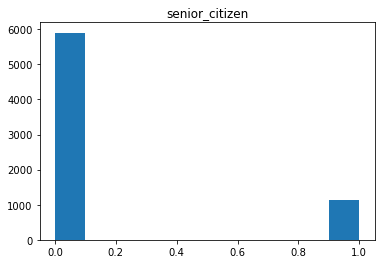

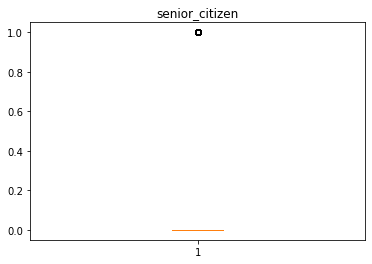

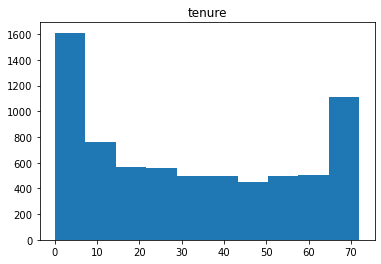

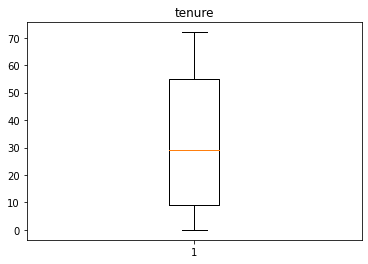

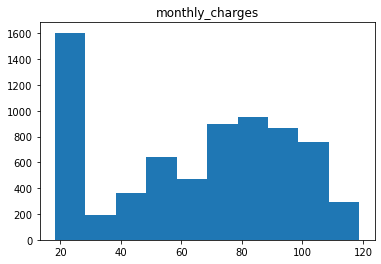

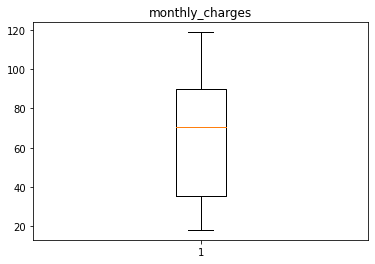

In [154]:
# Plot numeric columns
num_cols = df.columns[[(df[col].dtype == 'int64') or (df[col].dtype == 'float64') for col in df.columns]]
for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

In [157]:
# Use .describe with object columns
obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
obj_cols.to_list()


['gender',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [158]:
for col in obj_cols:
    print(col.upper())
    print('Count:')
    print(df[col].value_counts())
    print('\n')
    print('Proportions:')
    print(df[col].value_counts(normalize=True, dropna=False))
    print('--------------------------')
    print('\n')

GENDER
Count:
Male      3555
Female    3488
Name: gender, dtype: int64


Proportions:
Male      0.504756
Female    0.495244
Name: gender, dtype: float64
--------------------------


PARTNER
Count:
No     3641
Yes    3402
Name: partner, dtype: int64


Proportions:
No     0.516967
Yes    0.483033
Name: partner, dtype: float64
--------------------------


DEPENDENTS
Count:
No     4933
Yes    2110
Name: dependents, dtype: int64


Proportions:
No     0.700412
Yes    0.299588
Name: dependents, dtype: float64
--------------------------


PHONE_SERVICE
Count:
Yes    6361
No      682
Name: phone_service, dtype: int64


Proportions:
Yes    0.903166
No     0.096834
Name: phone_service, dtype: float64
--------------------------


MULTIPLE_LINES
Count:
No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64


Proportions:
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: multiple_lines, dtype: float64
-

# 3) Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.


In [159]:
# encode binary categorical variables into numeric values
df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0})

In [160]:
dummy_df = pd.get_dummies(df[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type']], dummy_na=False, \
                              drop_first=True)
dummy_df

,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
7039,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
7040,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7041,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1


In [161]:
df = pd.concat([df, dummy_df], axis=1)
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1


In [162]:
# encode number_relationships by utilizing information from dependents_encoded and partner_encoded
df['number_relationships'] = df['dependents_encoded'] + df['partner_encoded']

# convert streaming_tv into numeric data
df['streaming_tv_bool'] = df.streaming_tv.map({'Yes': 1, 'No': 0, 'No internet service': 0})

# convert streaming_movies into numeric data
df['streaming_movies_bool'] = df.streaming_movies.map({'Yes': 1, 'No': 0, 'No internet service': 0}) 

# encode number_streaming_services by utilizing information from streaming_tv_encoded and streaming_movies_encoded
df['number_streaming_services'] = df['streaming_tv_bool'] + df['streaming_movies_bool']

# convert online_security into numeric data
df['online_security_bool'] = df.online_security.map({'Yes': 1, 'No': 0, 'No internet service': 0})

# convert online_backup into numeric data
df['online_backup_bool'] = df.online_backup.map({'Yes': 1, 'No': 0, 'No internet service': 0}) 

# encode number_online_services by utilizing information from online_security_encoded and online_backup_encoded
df['number_online_services'] = df['online_security_bool'] + df['online_backup_bool']

# encode tenure in years (rounded down) by utilizing information from tenure (currently stored in months)
df['yearly_tenure'] = df.tenure.apply(lambda x: math.floor(x/12))

# encode has_internet
df['has_internet'] = df.internet_service_type.apply(lambda x: 0 if x == 'None' else 1)


In [163]:
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.churn)

train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.churn)


In [164]:
train.shape


(3943, 56)

In [165]:
validate.shape


(1691, 56)

In [166]:
test.shape


(1409, 56)

In [167]:
def split_telco_data(df):
    '''
    This function performs split on telco data, stratify churn.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.churn)
    train, validate = train_test_split(train_validate, test_size=.2, 
                                   random_state=123, 
                                   stratify=train_validate.churn)
    return train, validate, test

# 4) Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.



In [168]:
def prep_telco(df):
    # Drop duplicate columns
    df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], inplace=True)
       
    # Drop null values stored as whitespace    
    df['total_charges'] = df['total_charges'].str.strip()
    df = df[df.total_charges != '']
    
    # Convert to correct datatype
    df['total_charges'] = df.total_charges.astype(float)
    
    # Convert binary categorical variables to numeric
    df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
    df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
    df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
    df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
    df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
    df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0})
    
    # Get dummies for non-binary categorical variables
    dummy_df = pd.get_dummies(df[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type']], dummy_na=False, \
                              drop_first=True)
    
    # Concatenate dummy dataframe to original 
    df = pd.concat([df, dummy_df], axis=1)
    
    # split the data
    train, validate, test = split_telco_data(df)
    
    return train, validate, test


In [173]:
df = acquire.get_telco_data()
train, validata, test = prep_telco(df)
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
4216,Male,0,No,No,18,Yes,Yes,No,No,No,No,Yes,No,No,84.30,1537.90,No,Month-to-month,Fiber optic,Bank transfer (automatic),0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1477,Female,1,No,No,29,Yes,Yes,Yes,Yes,No,No,No,No,Yes,58.55,1718.95,No,Month-to-month,DSL,Bank transfer (automatic),1,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5752,Male,0,No,No,72,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,24.75,1777.60,No,Two year,None,Bank transfer (automatic),0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0
1377,Male,0,Yes,Yes,65,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,84.20,5324.50,No,Two year,DSL,Bank transfer (automatic),0,1,1,1,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0
3965,Female,0,Yes,Yes,58,Yes,No,Yes,Yes,No,No,Yes,Yes,No,99.25,5846.65,No,One year,Fiber optic,Credit card (automatic),1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0


In [174]:
train.isna().sum()

gender                                   0
senior_citizen                           0
partner                                  0
dependents                               0
tenure                                   0
phone_service                            0
multiple_lines                           0
online_security                          0
online_backup                            0
device_protection                        0
tech_support                             0
streaming_tv                             0
streaming_movies                         0
paperless_billing                        0
monthly_charges                          0
total_charges                            0
churn                                    0
contract_type                            0
internet_service_type                    0
payment_type                             0
gender_encoded                           0
partner_encoded                          0
dependents_encoded                       0
phone_servi